In [1]:
from mxnet import ndarray as nd

In [2]:
nd.zeros((3,4))


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
<NDArray 3x4 @cpu(0)>

In [3]:
x=nd.ones((4,5))

In [4]:
x


[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
<NDArray 4x5 @cpu(0)>

In [6]:
nd.array([[1,3],[3,3]])


[[1. 3.]
 [3. 3.]]
<NDArray 2x2 @cpu(0)>

# 线性回归
$\hat{y}=Xw+b$

$y[i] = 2 * X[i][0] - 3.4 * X[i][1] + 4.2 + noise$

noise为均值为0方差为0.1的正态分布噪音

In [11]:
from mxnet import ndarray as nd , autograd

num_inputs = 2
num_examples = 100
true_w = [2, -3.4]
true_b = 4.2
X = nd.random_normal(shape=(num_examples,num_inputs))
y = true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_b
y += .01 * nd.random_normal(shape=y.shape) # 均值为0方差为0.1的正态分布噪音

In [15]:
X[0]
y[0]


[0.48841557]
<NDArray 1 @cpu(0)>

## 数据读取

In [26]:
import random
batch_size = 10
def data_iter():
    idx = list(range(num_examples)) # 0,1,2...
    # print(idx)
    random.shuffle(idx) # 打乱
    # print(idx)
    for i in range(0,num_examples,batch_size):
        j = nd.array(idx[i:min(i+batch_size,num_examples)])
        yield nd.take(X, j), nd.take(y, j)

In [29]:
for data, label in data_iter():
    print(data,label)
    break
    


[[ 0.16687097 -0.46041864]
 [ 1.1116904   1.4935805 ]
 [ 0.5618714   1.9614024 ]
 [ 0.98779184 -0.06212901]
 [-1.3985771   0.8675137 ]
 [-0.13258979  0.5115878 ]
 [ 0.09316857  0.11958748]
 [ 0.1746321  -1.458135  ]
 [-2.0169916  -0.6378048 ]
 [ 1.2391653   0.2518609 ]]
<NDArray 10x2 @cpu(0)> 
[ 6.106396   1.3279362 -1.3384995  6.374099  -1.545251   2.1988962
  3.975011   9.519801   2.3291712  5.8152966]
<NDArray 10 @cpu(0)>


## 初始化模型参数
参考w ，b真实值，一个是2*1，一个是1*1
初始时随便设值，之后不断更新w和b接近wb真实值

In [38]:
w = nd.random_normal(shape=(num_inputs,1))
b = nd.zeros((1, ))
params = [w,b]
params

[
 [[ 0.44456944]
  [-0.01124159]]
 <NDArray 2x1 @cpu(0)>,
 
 [0.]
 <NDArray 1 @cpu(0)>]

In [39]:
for param in params:
    param.attach_grad() * 梯度下降

## 定义模型

In [40]:
def net(X):
    return nd.dot(X,w) + b

## 损失函数
衡量预测目标和真实目标的差距


In [41]:
def square_loss(yhat, y):
    return (yhat - y.reshape(yhat.shape)) ** 2

## 优化
随机梯度下降


In [44]:
def SGD(params, lr):
    for param in params:
        param[:] = param - lr * param.grad

## 训练
每次迭代随机读取固定数个数据点，计算梯度更新模型参数

In [56]:
epochs = 5
learning_rate = .001
for e in range(epochs):
    totol_loss = 0
    for data , label in data_iter():
        with autograd.record():
            output = net(data)
            loss = square_loss(output, label)
        loss.backward()
        SGD(params, learning_rate)
        
        totol_loss += nd.sum(loss).asscalar()
    print("Epoch %d, average loss: %f" % (e,totol_loss/num_examples))

Epoch 0, average loss: 0.000097
Epoch 1, average loss: 0.000096
Epoch 2, average loss: 0.000096
Epoch 3, average loss: 0.000095
Epoch 4, average loss: 0.000095


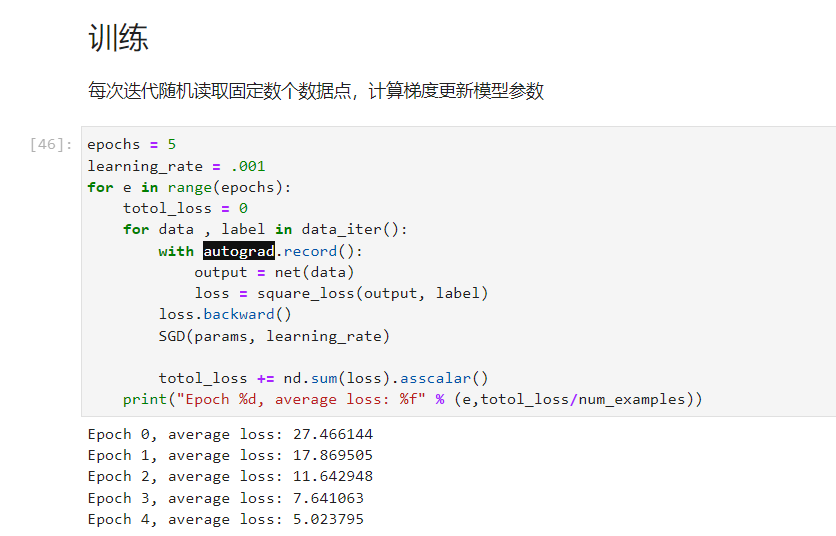


In [61]:
true_b,b


(4.2,
 
 [4.1989994]
 <NDArray 1 @cpu(0)>)

In [60]:
true_w,w

([2, -3.4],
 
 [[ 1.9960582]
  [-3.3984983]]
 <NDArray 2x1 @cpu(0)>)